Observations:
- Alt Min GAN works best with random normal z initialization and does not work (z does not get updated) with random uniform initialization
- DCGAN works best with random uniform z initialization and does not work (checkboarding and MRI gets masked by background) with random normal
- Alt Min converges very fast (within 0.25 epoch) compared to DCGAN (many epochs)
- Alt Min loss converges to small quantity (~0.002) 
- Alt Min GAN results: blurry, no obstructing artifacts
    - Attempts to add detail: L1 regularization of Z during its training -> results: bluriness is same, overall quality similar/worse
    - Future ideas: ratio of z/gen (probably won't change much), incorperating discrim after initial convergence, train on conventional data (mnist)
- Wasserstein GAN results: blurry and checkboarded
- DCGAN results: detailed but not accurate



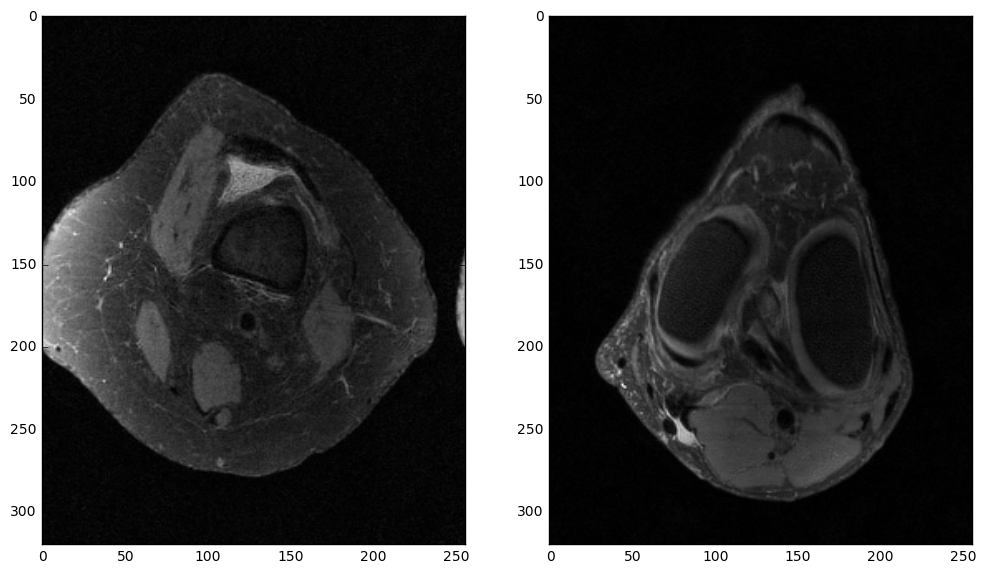

In [1]:
import sys 
sys.path.append('..')

import matplotlib.pyplot as plt
from glob import glob
import ra
import numpy as np
from utils import *

#orig data
data = glob("../data/train_img_slices/*.ra")
np.random.shuffle(data)
img1 = imread(data[0])
img2 = imread(data[1])

def show_images(images, cols = 1):
    n_images = len(images)
    fig = plt.figure()
    for n, image in enumerate(images):
        a = fig.add_subplot(cols, np.ceil(n_images/float(cols)), n + 1)
        plt.imshow(image, cmap='gray')
    fig.set_size_inches(np.array(fig.get_size_inches()) * n_images)
    plt.show()
    

show_images([img1, img2])

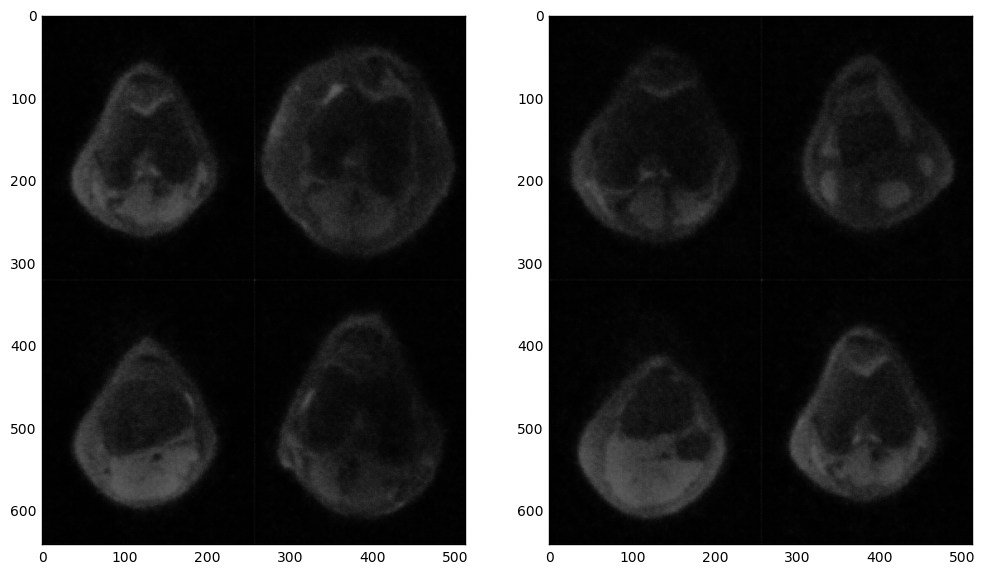

In [63]:
# alt min: z=1000, no regularization, batch = 4

altmin = (glob("../recon_gan/samples2/*.png"))[-4:-2]
altmin = [scipy.misc.imread(i) for i in altmin]
show_images(altmin)

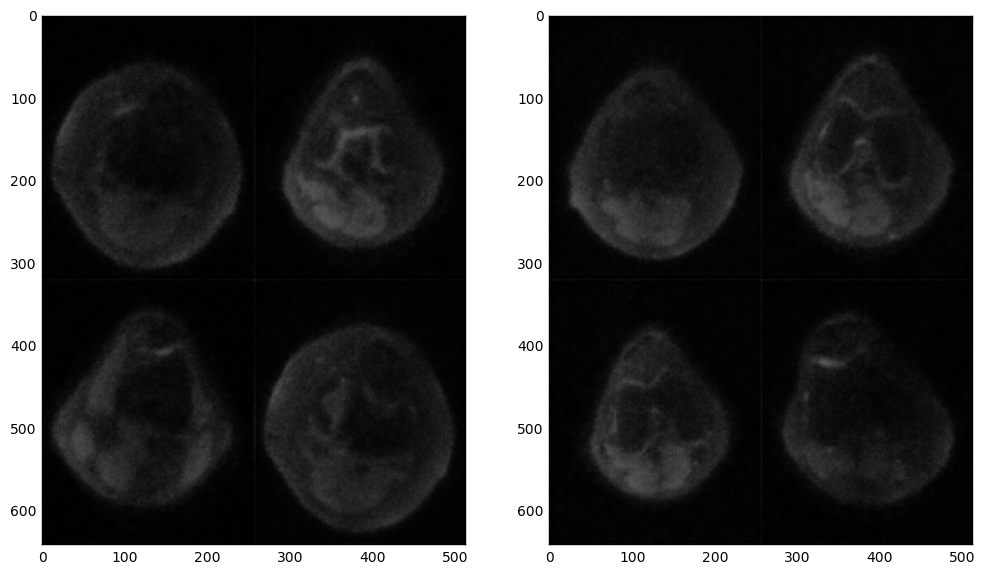

In [57]:
# alt min: z=1000, l1 reg on z, batch = 4

altmin = (glob("../recon_gan/samples3/*.png"))[-2:]
altmin = [scipy.misc.imread(i) for i in altmin]
show_images(altmin)

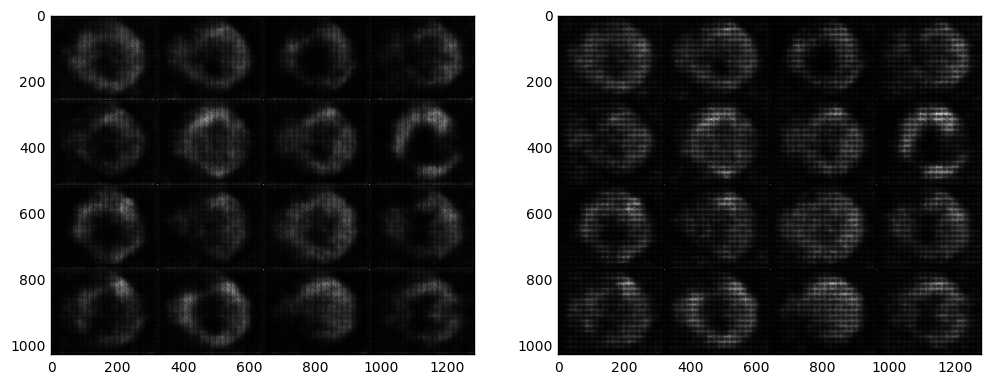

In [64]:
# wgan: z=100, uniform dist, batch = 16

wgan = ["../WassersteinGAN-TensorFlow/_samples/train_672_0005.png", "../WassersteinGAN-TensorFlow/_samples/train_678_0005.png"]
wgan = [scipy.misc.imread(i) for i in wgan]
show_images(wgan)

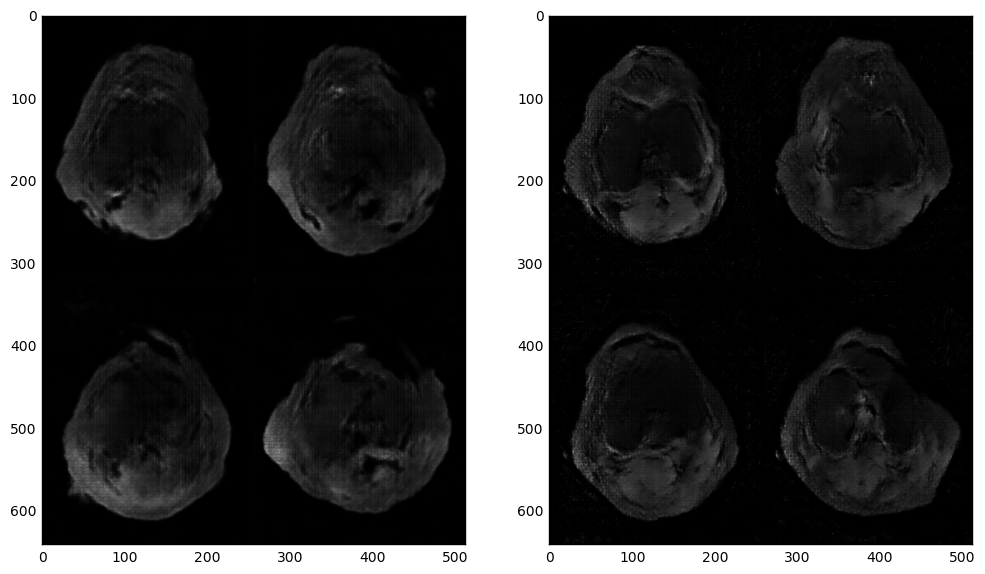

In [2]:
# dcgan: z=100, uniform dist, batch = 4

dcgan = (glob("../comparison_samples/*.png"))[-2:]
dcgan = [scipy.misc.imread(i) for i in dcgan]
show_images(dcgan)